In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')  # Adjust path if needed

# Drop rows with missing values (if any)
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [3]:
# Encode target label: 'Presence' => 1, 'Absence' => 0
le_target = LabelEncoder()
df['Heart Disease'] = le_target.fit_transform(df['Heart Disease'])
print("Target label encoding:", dict(zip(le_target.classes_, le_target.transform(le_target.classes_))))

Target label encoding: {'Absence': 0, 'Presence': 1}


In [4]:
# Split features and target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


=== Classification Report ===
0 => Absence
1 => Presence

Confusion Matrix:
 [[32  1]
 [ 4 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Accuracy: 0.9074074074074074


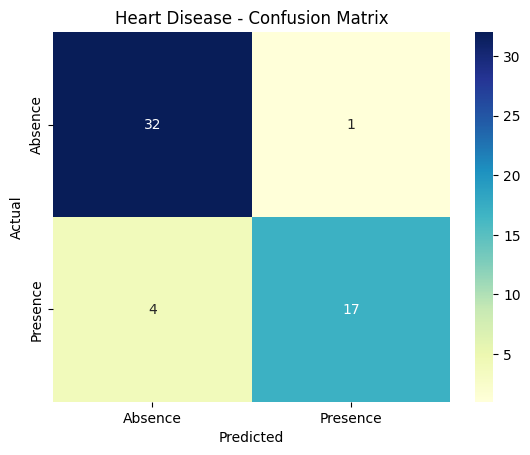

In [6]:

# Evaluation
print("\n=== Classification Report ===")
print("0 => Absence\n1 => Presence\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Confusion matrix heatmap with labels
cm = confusion_matrix(y_test, y_pred)
labels = ['Absence', 'Presence']
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Heart Disease - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
